# Data EDA

In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
train_df = pd.read_csv('/data/ephemeral/home/data/train.csv')
dev_df = pd.read_csv('/data/ephemeral/home/data/dev.csv')
test_df = pd.read_csv('/data/ephemeral/home/data/test.csv')

In [3]:
train_df.head()

,fname,dialogue,summary,topic
0,train_0,"#Person1#: 안녕하세요, 스미스씨. 저는 호킨스 의사입니다. 오늘 왜 오셨나...","스미스씨가 건강검진을 받고 있고, 호킨스 의사는 매년 건강검진을 받는 것을 권장합니...",건강검진 받기
1,train_1,"#Person1#: 안녕하세요, 파커 부인, 어떻게 지내셨나요?\n#Person2#...",파커 부인이 리키를 데리고 백신 접종을 하러 갔다. 피터스 박사는 기록을 확인한 후...,백신
2,train_2,"#Person1#: 실례합니다, 열쇠 한 묶음 보셨나요?\n#Person2#: 어떤...","#Person1#은 열쇠 한 묶음을 찾고 있고, 그것을 찾기 위해 #Person2#...",열쇠 찾기
3,train_3,#Person1#: 왜 너는 여자친구가 있다는 걸 말해주지 않았어?\n#Person...,#Person1#은 #Person2#가 여자친구가 있고 그녀와 결혼할 것이라는 사실...,여자친구가 있다
4,train_4,"#Person1#: 안녕, 숙녀분들! 오늘 밤 당신들은 정말 멋져 보여. 이 춤을 ...",말릭이 니키에게 춤을 요청한다. 말릭이 발을 밟는 것을 신경 쓰지 않는다면 니키는 ...,댄스


In [4]:
dev_df.head()

,fname,dialogue,summary,topic
0,dev_0,"#Person1#: 안녕하세요, 오늘 하루 어떠셨어요? \n#Person2#: 요즘...",#Person2#는 숨쉬기에 어려움을 겪는다. 의사는 #Person1#에게 이에 대...,의사에게 상담하기
1,dev_1,"#Person1#: 헤이, 지미. 나중에 운동하러 가자.\n#Person2#: 그래...",#Person1#은 지미에게 운동하러 가자고 제안하고 팔과 배를 운동하도록 설득한다.,운동하기
2,dev_2,#Person1#: 나는 더 이상 건강에 해로운 음식을 먹는 것을 멈춰야 해.\n#...,"#Person1#은 건강에 해로운 음식을 먹는 것을 멈추려는 계획을 세우고, #Pe...",건강한 음식
3,dev_3,"#Person1#: UFO를 믿으세요?\n#Person2#: 물론이죠, 그들은 저기...",#Person2#는 UFO를 믿고 꿈에서 그들을 볼 수 있다고 말한다. #Perso...,UFO와 외계인
4,dev_4,#Person1#: 오늘 학교에 갔어?\n#Person2#: 당연하지. 너는?\n#...,#Person1#은 오늘 학교에 가지 않았다. #Person2#는 내일 수업을 빼먹...,학교 가기


In [5]:
test_df.head()

,fname,dialogue
0,test_0,"#Person1#: 더슨 씨, 받아쓰기 좀 해주세요. \n#Person2#: 네, ..."
1,test_1,#Person1#: 드디어 왔네! 왜 그렇게 오래 걸렸어?\n#Person2#: 또...
2,test_2,"#Person1#: 케이트, 무슨 일이 일어났는지 너는 믿지 못할거야. \n#Per..."
3,test_3,"#Person1#: 생일 축하해, 이건 너를 위한 거야, 브라이언.\n#Person..."
4,test_4,#Person1#: 이 올림픽 공원이 정말 크네요!\n#Person2#: 네. 지금...


In [6]:
def preprocess(s):
    re.sub(r'[ㄱ-ㅎㅏ-ㅣ]+', '', s)  # 자음과 모음 제거
    re.sub(r'\[.*?\]', '', s)  # 대괄호로 둘러싸인 텍스트 제거
    re.sub(r"[^가-힣a-z0-9#@,-\[\]\(\)]", " ", s)  # 한글,영어,특수문자 외(이모지, :,?,! 등)공백으로 변환
    s = re.sub(r"([.,!?])\1+", r"\1", s) 
    re.sub(r'[" "]+', " ", s)  # 여러 개의 공백을 하나의 공백으로 바꿈
    s.strip()  # 문장 양쪽 공백 제거
    
    return s


train_df['preprocessed_dialogue'] = train_df['dialogue'].apply(preprocess)
train_df['preprocessed_summary'] = train_df['summary'].apply(preprocess)

dev_df['preprocessed_dialogue'] = dev_df['dialogue'].apply(preprocess)
dev_df['preprocessed_summary'] = dev_df['summary'].apply(preprocess)

test_df['preprocessed_dialogue'] = test_df['dialogue'].apply(preprocess)

In [7]:
train_df.to_csv('/data/ephemeral/home/data/preprocessed/train.csv', index=False)
dev_df.to_csv('/data/ephemeral/home/data/preprocessed/dev.csv', index=False)
test_df.to_csv('/data/ephemeral/home/data/preprocessed/test.csv', index=False)

In [7]:
train_df

,fname,dialogue,summary,topic,preprocessed_dialogue,preprocessed_summary
0,train_0,"#Person1#: 안녕하세요, 스미스씨. 저는 호킨스 의사입니다. 오늘 왜 오셨나...","스미스씨가 건강검진을 받고 있고, 호킨스 의사는 매년 건강검진을 받는 것을 권장합니...",건강검진 받기,"#Person1#: 안녕하세요, 스미스씨. 저는 호킨스 의사입니다. 오늘 왜 오셨나...","스미스씨가 건강검진을 받고 있고, 호킨스 의사는 매년 건강검진을 받는 것을 권장합니..."
1,train_1,"#Person1#: 안녕하세요, 파커 부인, 어떻게 지내셨나요?\n#Person2#...",파커 부인이 리키를 데리고 백신 접종을 하러 갔다. 피터스 박사는 기록을 확인한 후...,백신,"#Person1#: 안녕하세요, 파커 부인, 어떻게 지내셨나요?\n#Person2#...",파커 부인이 리키를 데리고 백신 접종을 하러 갔다. 피터스 박사는 기록을 확인한 후...
2,train_2,"#Person1#: 실례합니다, 열쇠 한 묶음 보셨나요?\n#Person2#: 어떤...","#Person1#은 열쇠 한 묶음을 찾고 있고, 그것을 찾기 위해 #Person2#...",열쇠 찾기,"#Person1#: 실례합니다, 열쇠 한 묶음 보셨나요?\n#Person2#: 어떤...","#Person1#은 열쇠 한 묶음을 찾고 있고, 그것을 찾기 위해 #Person2#..."
3,train_3,#Person1#: 왜 너는 여자친구가 있다는 걸 말해주지 않았어?\n#Person...,#Person1#은 #Person2#가 여자친구가 있고 그녀와 결혼할 것이라는 사실...,여자친구가 있다,#Person1#: 왜 너는 여자친구가 있다는 걸 말해주지 않았어?\n#Person...,#Person1#은 #Person2#가 여자친구가 있고 그녀와 결혼할 것이라는 사실...
4,train_4,"#Person1#: 안녕, 숙녀분들! 오늘 밤 당신들은 정말 멋져 보여. 이 춤을 ...",말릭이 니키에게 춤을 요청한다. 말릭이 발을 밟는 것을 신경 쓰지 않는다면 니키는 ...,댄스,"#Person1#: 안녕, 숙녀분들! 오늘 밤 당신들은 정말 멋져 보여. 이 춤을 ...",말릭이 니키에게 춤을 요청한다. 말릭이 발을 밟는 것을 신경 쓰지 않는다면 니키는 ...
...,...,...,...,...,...,...
12452,train_12455,#Person1#: 실례합니다. 맨체스터 출신의 그린 씨이신가요?\n#Person2...,탄 링은 흰머리와 수염으로 쉽게 인식되는 그린 씨를 만나 호텔로 데려갈 예정입니다....,누군가를 태우다,#Person1#: 실례합니다. 맨체스터 출신의 그린 씨이신가요?\n#Person2...,탄 링은 흰머리와 수염으로 쉽게 인식되는 그린 씨를 만나 호텔로 데려갈 예정입니다....
12453,train_12456,#Person1#: 이윙 씨가 우리가 컨퍼런스 센터에 오후 4시에 도착해야 한다고 ...,#Person1#과 #Person2#는 이윙 씨가 늦지 않도록 요청했기 때문에 컨퍼...,컨퍼런스 센터,#Person1#: 이윙 씨가 우리가 컨퍼런스 센터에 오후 4시에 도착해야 한다고 ...,#Person1#과 #Person2#는 이윙 씨가 늦지 않도록 요청했기 때문에 컨퍼...
12454,train_12457,#Person1#: 오늘 어떻게 도와드릴까요?\n#Person2#: 차를 빌리고 싶...,#Person2#는 #Person1#의 도움으로 5일 동안 소형 차를 빌립니다.,차 렌트,#Person1#: 오늘 어떻게 도와드릴까요?\n#Person2#: 차를 빌리고 싶...,#Person2#는 #Person1#의 도움으로 5일 동안 소형 차를 빌립니다.
12455,train_12458,#Person1#: 오늘 좀 행복해 보이지 않아. 무슨 일 있어?\n#Person2...,#Person2#의 엄마가 일자리를 잃었다. #Person2#는 엄마가 우울해하지 ...,실직,#Person1#: 오늘 좀 행복해 보이지 않아. 무슨 일 있어?\n#Person2...,#Person2#의 엄마가 일자리를 잃었다. #Person2#는 엄마가 우울해하지 ...


In [8]:
dev_df

,fname,dialogue,summary,topic,preprocessed_dialogue,preprocessed_summary
0,dev_0,"#Person1#: 안녕하세요, 오늘 하루 어떠셨어요? \n#Person2#: 요즘...",#Person2#는 숨쉬기에 어려움을 겪는다. 의사는 #Person1#에게 이에 대...,의사에게 상담하기,"#Person1#: 안녕하세요, 오늘 하루 어떠셨어요? \n#Person2#: 요즘...",#Person2#는 숨쉬기에 어려움을 겪는다. 의사는 #Person1#에게 이에 대...
1,dev_1,"#Person1#: 헤이, 지미. 나중에 운동하러 가자.\n#Person2#: 그래...",#Person1#은 지미에게 운동하러 가자고 제안하고 팔과 배를 운동하도록 설득한다.,운동하기,"#Person1#: 헤이, 지미. 나중에 운동하러 가자.\n#Person2#: 그래...",#Person1#은 지미에게 운동하러 가자고 제안하고 팔과 배를 운동하도록 설득한다.
2,dev_2,#Person1#: 나는 더 이상 건강에 해로운 음식을 먹는 것을 멈춰야 해.\n#...,"#Person1#은 건강에 해로운 음식을 먹는 것을 멈추려는 계획을 세우고, #Pe...",건강한 음식,#Person1#: 나는 더 이상 건강에 해로운 음식을 먹는 것을 멈춰야 해.\n#...,"#Person1#은 건강에 해로운 음식을 먹는 것을 멈추려는 계획을 세우고, #Pe..."
3,dev_3,"#Person1#: UFO를 믿으세요?\n#Person2#: 물론이죠, 그들은 저기...",#Person2#는 UFO를 믿고 꿈에서 그들을 볼 수 있다고 말한다. #Perso...,UFO와 외계인,"#Person1#: UFO를 믿으세요?\n#Person2#: 물론이죠, 그들은 저기...",#Person2#는 UFO를 믿고 꿈에서 그들을 볼 수 있다고 말한다. #Perso...
4,dev_4,#Person1#: 오늘 학교에 갔어?\n#Person2#: 당연하지. 너는?\n#...,#Person1#은 오늘 학교에 가지 않았다. #Person2#는 내일 수업을 빼먹...,학교 가기,#Person1#: 오늘 학교에 갔어?\n#Person2#: 당연하지. 너는?\n#...,#Person1#은 오늘 학교에 가지 않았다. #Person2#는 내일 수업을 빼먹...
...,...,...,...,...,...,...
494,dev_495,#Person1#: 이제 새해가 되어서 새로운 시작을 하려고 결심했어. \r\n#P...,#Person1#은 새해에 금연을 하고 커밍아웃하기로 결정했습니다. #Person2...,새해,#Person1#: 이제 새해가 되어서 새로운 시작을 하려고 결심했어. \r\n#P...,#Person1#은 새해에 금연을 하고 커밍아웃하기로 결정했습니다. #Person2...
495,dev_496,"#Person1#: 너, 조랑 결혼했지? \r\n#Person2#: 조? 무슨 말인...",#Person1#은 #Person2#가 조와 결혼했다고 생각했다. #Person2#...,사랑에 빠지다,"#Person1#: 너, 조랑 결혼했지? \r\n#Person2#: 조? 무슨 말인...",#Person1#은 #Person2#가 조와 결혼했다고 생각했다. #Person2#...
496,dev_497,"#Person1#: 무엇을 도와드릴까요, 부인?\r\n#Person2#: 몇 주 동...",#Person2#의 차에서 이상한 소리가 납니다. #Person1#는 브레이크를 교...,소음,"#Person1#: 무엇을 도와드릴까요, 부인?\r\n#Person2#: 몇 주 동...",#Person2#의 차에서 이상한 소리가 납니다. #Person1#는 브레이크를 교...
497,dev_498,"#Person1#: 안녕하세요, 아마존 고객 서비스입니다. 무엇을 도와드릴까요?\n...",#Person2#님이 아마존 고객 서비스에 전화하여 아마존에서 받은 책에 한 페이지...,빠진 페이지,"#Person1#: 안녕하세요, 아마존 고객 서비스입니다. 무엇을 도와드릴까요?\n...",#Person2#님이 아마존 고객 서비스에 전화하여 아마존에서 받은 책에 한 페이지...


In [9]:
test_df

,fname,dialogue,preprocessed_dialogue
0,test_0,"#Person1#: 더슨 씨, 받아쓰기 좀 해주세요. \n#Person2#: 네, ...","#Person1#: 더슨 씨, 받아쓰기 좀 해주세요. \n#Person2#: 네, ..."
1,test_1,#Person1#: 드디어 왔네! 왜 그렇게 오래 걸렸어?\n#Person2#: 또...,#Person1#: 드디어 왔네! 왜 그렇게 오래 걸렸어?\n#Person2#: 또...
2,test_2,"#Person1#: 케이트, 무슨 일이 일어났는지 너는 믿지 못할거야. \n#Per...","#Person1#: 케이트, 무슨 일이 일어났는지 너는 믿지 못할거야. \n#Per..."
3,test_3,"#Person1#: 생일 축하해, 이건 너를 위한 거야, 브라이언.\n#Person...","#Person1#: 생일 축하해, 이건 너를 위한 거야, 브라이언.\n#Person..."
4,test_4,#Person1#: 이 올림픽 공원이 정말 크네요!\n#Person2#: 네. 지금...,#Person1#: 이 올림픽 공원이 정말 크네요!\n#Person2#: 네. 지금...
...,...,...,...
494,test_495,"#Person1#: 헤이, 찰리, 학교 끝나고 우리 집에 와서 나랑 비디오 게임 할...","#Person1#: 헤이, 찰리, 학교 끝나고 우리 집에 와서 나랑 비디오 게임 할..."
495,test_496,#Person1#: 어떻게 컨트리 음악에 관심을 가지게 되었나요?\r\n#Perso...,#Person1#: 어떻게 컨트리 음악에 관심을 가지게 되었나요?\r\n#Perso...
496,test_497,"#Person1#: 실례합니다, 앨리스. 이곳을 사용해본 적이 없는데, 기계를 어떻...","#Person1#: 실례합니다, 앨리스. 이곳을 사용해본 적이 없는데, 기계를 어떻..."
497,test_498,#Person1#: 매튜? 안녕!\r\n#Person2#: 스티브! 오랜만이네! 얼...,#Person1#: 매튜? 안녕!\r\n#Person2#: 스티브! 오랜만이네! 얼...


In [12]:
tmp1 = pd.read_csv('/data/ephemeral/home/data/preprocessed/train.csv')
tmp1

,fname,dialogue,summary,topic,prerpocessed_dialogue,prerpocessed_summary
0,train_0,"#Person1#: 안녕하세요, 스미스씨. 저는 호킨스 의사입니다. 오늘 왜 오셨나...","스미스씨가 건강검진을 받고 있고, 호킨스 의사는 매년 건강검진을 받는 것을 권장합니...",건강검진 받기,"#Person1#: 안녕하세요, 스미스씨. 저는 호킨스 의사입니다. 오늘 왜 오셨나...","스미스씨가 건강검진을 받고 있고, 호킨스 의사는 매년 건강검진을 받는 것을 권장합니..."
1,train_1,"#Person1#: 안녕하세요, 파커 부인, 어떻게 지내셨나요?\n#Person2#...",파커 부인이 리키를 데리고 백신 접종을 하러 갔다. 피터스 박사는 기록을 확인한 후...,백신,"#Person1#: 안녕하세요, 파커 부인, 어떻게 지내셨나요?\n#Person2#...",파커 부인이 리키를 데리고 백신 접종을 하러 갔다. 피터스 박사는 기록을 확인한 후...
2,train_2,"#Person1#: 실례합니다, 열쇠 한 묶음 보셨나요?\n#Person2#: 어떤...","#Person1#은 열쇠 한 묶음을 찾고 있고, 그것을 찾기 위해 #Person2#...",열쇠 찾기,"#Person1#: 실례합니다, 열쇠 한 묶음 보셨나요?\n#Person2#: 어떤...","#Person1#은 열쇠 한 묶음을 찾고 있고, 그것을 찾기 위해 #Person2#..."
3,train_3,#Person1#: 왜 너는 여자친구가 있다는 걸 말해주지 않았어?\n#Person...,#Person1#은 #Person2#가 여자친구가 있고 그녀와 결혼할 것이라는 사실...,여자친구가 있다,#Person1#: 왜 너는 여자친구가 있다는 걸 말해주지 않았어?\n#Person...,#Person1#은 #Person2#가 여자친구가 있고 그녀와 결혼할 것이라는 사실...
4,train_4,"#Person1#: 안녕, 숙녀분들! 오늘 밤 당신들은 정말 멋져 보여. 이 춤을 ...",말릭이 니키에게 춤을 요청한다. 말릭이 발을 밟는 것을 신경 쓰지 않는다면 니키는 ...,댄스,"#Person1#: 안녕, 숙녀분들! 오늘 밤 당신들은 정말 멋져 보여. 이 춤을 ...",말릭이 니키에게 춤을 요청한다. 말릭이 발을 밟는 것을 신경 쓰지 않는다면 니키는 ...
...,...,...,...,...,...,...
12452,train_12455,#Person1#: 실례합니다. 맨체스터 출신의 그린 씨이신가요?\n#Person2...,탄 링은 흰머리와 수염으로 쉽게 인식되는 그린 씨를 만나 호텔로 데려갈 예정입니다....,누군가를 태우다,#Person1#: 실례합니다. 맨체스터 출신의 그린 씨이신가요?\n#Person2...,탄 링은 흰머리와 수염으로 쉽게 인식되는 그린 씨를 만나 호텔로 데려갈 예정입니다....
12453,train_12456,#Person1#: 이윙 씨가 우리가 컨퍼런스 센터에 오후 4시에 도착해야 한다고 ...,#Person1#과 #Person2#는 이윙 씨가 늦지 않도록 요청했기 때문에 컨퍼...,컨퍼런스 센터,#Person1#: 이윙 씨가 우리가 컨퍼런스 센터에 오후 4시에 도착해야 한다고 ...,#Person1#과 #Person2#는 이윙 씨가 늦지 않도록 요청했기 때문에 컨퍼...
12454,train_12457,#Person1#: 오늘 어떻게 도와드릴까요?\n#Person2#: 차를 빌리고 싶...,#Person2#는 #Person1#의 도움으로 5일 동안 소형 차를 빌립니다.,차 렌트,#Person1#: 오늘 어떻게 도와드릴까요?\n#Person2#: 차를 빌리고 싶...,#Person2#는 #Person1#의 도움으로 5일 동안 소형 차를 빌립니다.
12455,train_12458,#Person1#: 오늘 좀 행복해 보이지 않아. 무슨 일 있어?\n#Person2...,#Person2#의 엄마가 일자리를 잃었다. #Person2#는 엄마가 우울해하지 ...,실직,#Person1#: 오늘 좀 행복해 보이지 않아. 무슨 일 있어?\n#Person2...,#Person2#의 엄마가 일자리를 잃었다. #Person2#는 엄마가 우울해하지 ...


# 특정 형태 확인
- #~~#
- ~~씨

In [ ]:
pattern = r'#(.*?)#'
pattern_list = []

for i in range(train_df.shape[0]):
    s = train_df.iloc[i, 1]
    matches = re.findall(pattern, s)
    pattern_list.extend(matches)

special_tokens = list(set(pattern_list))
special_tokens = [f'#{item}#' for item in special_tokens]
special_tokens

In [ ]:
pattern = r'\b\w+씨\b'
name_list = []

for i in range(train_df.shape[0]):
    s = train_df.iloc[i, 1]
    matches = re.findall(pattern, s)
    pattern_list.extend(matches)

name_special_tokens = list(set(pattern_list))
#name_special_tokens = [f'#{item}#' for item in special_tokens]
print(name_special_tokens)

In [ ]:
name_list = ['', '조너스씨', '블랙씨', '해머씨', '양양씨', '프랭크씨', '리처드씨', '레이씨', 'CarNumber', '슷클리프씨', '앨리스씨', '포드씨', '윌슨씨', '혼씨', '잭씨', '라이언씨', '리사씨', '베이츠씨', '하디씨', '메이씨', '에이미씨', 'Person6', '레밍턴씨', '윌리엄스씨', '모니카씨', '브리그스씨', '케이트씨', '탕씨', '사라씨', '메리씨', 'Person7', '제임스씨', '그렉씨', '토마스씨', '로라씨', '크로프트씨', '원더씨', '손글씨', 'PhoneNumber', '처치씨', '헨리씨', 'PhoneNumber이고, 휴대폰 번호는 ', '짐씨', '지미씨', '우드하우스씨', '린다씨', 'Person 2', '선씨', '홍씨', '마리아씨', '날씨', '왕씨', '톰씨', '주디씨', 'DateOfBirth', 'Email', '한슨씨', '카론씨', '브리지스씨', '로저씨', '행크스씨', '코발스키씨', '존스씨', '게일씨', '릭씨', '산체스씨', '쿠퍼씨', '잭슨씨', '브론씨', '하오씨', '월씨', '휴즈씨', '이씨', '자넷씨', '밥씨', '채양씨', '이킨스씨', '화이트씨', '앤더슨씨', '양씨', '리브씨', '맥퀼린씨', '스티븐스씨', '마샤씨', '섭씨', '문씨', '조지씨', '힐튼씨', '밀러씨', '아저씨', 'A씨', '마씨', '찰스씨', '원씨', '셀리나씨', '넬슨씨', '캐씨', '베이커씨', '레이놀즈씨', '케이씨', '딕씨', '저스틴씨', '서머필드씨', '여씨', '모리스씨', '파커씨', 'PassportNumber', '주씨', 'Person5', '파밍턴씨', '쉘리씨', '데이비스씨', '그웬트씨', '스미스씨', '와스씨', '에이비씨', '리우씨', '그린씨', '토니씨', '포스터씨', '스튜어트씨', '셜리씨', '파슨스씨', '멜린다씨', '돈씨', 'SSN', '미셸씨', '마틴씨', '루이스씨', 'Person', '우씨', '아가씨', 'Person1', '존슨씨', '빌씨', '캠프씨', '강씨', '벤슨씨', '베티씨', '리씨', '올리비아씨', '줄리씨', '쿡씨', '샌들스씨', 'CardNumber', '헨더슨씨', 'Address', '사람씨', '제이콥씨', '심슨씨', '테일러씨', '트렌트씨', '다시씨', '화씨', '김씨', 'Person4', '루시씨', '슐러씨', '제이슨씨', 'B씨', '셀러즈씨', '클라크씨', 'Person2', '페니씨', '월튼씨', '프레드씨', 'Cathy씨', '제리씨', '필립스씨', '브라운씨', '엘리자베스씨', '브룩씨', 'Person3', '프란시스씨', '찬씨', '아론씨']
print(len(name_list))

name_list = list(set(['', '조너스씨', '블랙씨', '해머씨', '양양씨', '프랭크씨', '리처드씨', '레이씨', 'CarNumber', '슷클리프씨', '앨리스씨', '포드씨', '윌슨씨', '혼씨', '잭씨', '라이언씨', '리사씨', '베이츠씨', '하디씨', '메이씨', '에이미씨', 'Person6', '레밍턴씨', '윌리엄스씨', '모니카씨', '브리그스씨', '케이트씨', '탕씨', '사라씨', '메리씨', 'Person7', '제임스씨', '그렉씨', '토마스씨', '로라씨', '크로프트씨', '원더씨', '손글씨', 'PhoneNumber', '처치씨', '헨리씨', 'PhoneNumber이고, 휴대폰 번호는 ', '짐씨', '지미씨', '우드하우스씨', '린다씨', 'Person 2', '선씨', '홍씨', '마리아씨', '날씨', '왕씨', '톰씨', '주디씨', 'DateOfBirth', 'Email', '한슨씨', '카론씨', '브리지스씨', '로저씨', '행크스씨', '코발스키씨', '존스씨', '게일씨', '릭씨', '산체스씨', '쿠퍼씨', '잭슨씨', '브론씨', '하오씨', '월씨', '휴즈씨', '이씨', '자넷씨', '밥씨', '채양씨', '이킨스씨', '화이트씨', '앤더슨씨', '양씨', '리브씨', '맥퀼린씨', '스티븐스씨', '마샤씨', '섭씨', '문씨', '조지씨', '힐튼씨', '밀러씨', '아저씨', 'A씨', '마씨', '찰스씨', '원씨', '셀리나씨', '넬슨씨', '캐씨', '베이커씨', '레이놀즈씨', '케이씨', '딕씨', '저스틴씨', '서머필드씨', '여씨', '모리스씨', '파커씨', 'PassportNumber', '주씨', 'Person5', '파밍턴씨', '쉘리씨', '데이비스씨', '그웬트씨', '스미스씨', '와스씨', '에이비씨', '리우씨', '그린씨', '토니씨', '포스터씨', '스튜어트씨', '셜리씨', '파슨스씨', '멜린다씨', '돈씨', 'SSN', '미셸씨', '마틴씨', '루이스씨', 'Person', '우씨', '아가씨', 'Person1', '존슨씨', '빌씨', '캠프씨', '강씨', '벤슨씨', '베티씨', '리씨', '올리비아씨', '줄리씨', '쿡씨', '샌들스씨', 'CardNumber', '헨더슨씨', 'Address', '사람씨', '제이콥씨', '심슨씨', '테일러씨', '트렌트씨', '다시씨', '화씨', '김씨', 'Person4', '루시씨', '슐러씨', '제이슨씨', 'B씨', '셀러즈씨', '클라크씨', 'Person2', '페니씨', '월튼씨', '프레드씨', 'Cathy씨', '제리씨', '필립스씨', '브라운씨', '엘리자베스씨', '브룩씨', 'Person3', '프란시스씨', '찬씨', '아론씨']))
print(len(name_list))
print(name_list)

In [ ]:
name_special_tokens = ['조너스', '블랙', '해머', '양양', '프랭크', '리처드', '레이', 
                       '슷클리프', '앨리스', '포드', '윌슨', '라이언', '잭',
                       '리사', '베이츠', '하디', '메이', '에이미', '레밍턴', '윌리엄스', 
                       '모니카', '브리그스', '케이트', '탕', '사라', '메리', '제임스', 
                       '그렉', '토마스', '로라', '크로프트', '원더', '처치', '헨리', 
                       '짐씨', '지미', '우드하우스', '린다', '선', '홍', '마리아', 
                       '톰', '주디', '한슨', '카론', '브리지스', '로저', '행크스', '코발스키', '존스', 
                       '게일', '릭', '산체스', '쿠퍼', '잭슨', '브론', '하오', '휴즈', '자넷', 
                       '채양', '이킨스', '화이트', '앤더슨', '양', '리브', '맥퀼린', '스티븐스', 
                       '마샤', '문', '조지', '힐튼', '밀러', '마', '찰스', '셀리나', '넬슨', '레이놀즈', '케이', '케이티',
                       '저스틴', '서머필드', '모리스', '파커', '파밍턴', '쉘리', '데이비스', '그웬트', '스미스', '와스', 
                       '토니', '스튜어트', '셜리', '파슨스', '멜린다', '미셸', '마틴', '루이스', '존슨', '벤슨', '베티', '올리비아', 
                       '줄리', '샌들스', '헨더슨', '제이콥', '심슨', '테일러', '트렌트', '루시', '슐러', '제이슨', '셀러즈', 
                       '클라크', '월튼', 'Cathy', '제리씨', '필립스', '엘리자베스', '브룩', '아론', '호킨스']

In [ ]:
for i in range(10):
    

# Tokenizing
- 토크나이징 후 길이 확인

In [10]:
import pandas as pd
import os
import re
import json
import yaml
from glob import glob
from tqdm import tqdm
from pprint import pprint
import torch
import pytorch_lightning as pl
from rouge import Rouge # 모델의 성능을 평가하기 위한 라이브러리입니다.

from torch.utils.data import Dataset , DataLoader
from transformers import AutoTokenizer, BartForConditionalGeneration, BartConfig
from transformers import Seq2SeqTrainingArguments, Seq2SeqTrainer
from transformers import Trainer, TrainingArguments
from transformers import EarlyStoppingCallback

import wandb # 모델 학습 과정을 손쉽게 Tracking하고, 시각화할 수 있는 라이브러리입니다.

In [12]:
tokenizer = AutoTokenizer.from_pretrained("EbanLee/kobart-summary-v3")

In [ ]:
# special token 추가

special_tokens += name_special_tokens
print(special_tokens)
special_tokens_dict = {'additional_special_tokens':special_tokens}
tokenizer.add_special_tokens(special_tokens_dict)

## 원본 문장

In [13]:
tokenized_list = []
tokenized_len_list = []

for i in range(train_df.shape[0]):
    s = train_df.iloc[i, 1]
    tokenized = tokenizer.encode(s)

    tokenized_list.append(tokenized)
    tokenized_len_list.append(len(tokenized))

train_df['tokenized'] = tokenized_list
train_df['tokenized_len'] = tokenized_len_list

<Axes: xlabel='tokenized_len'>

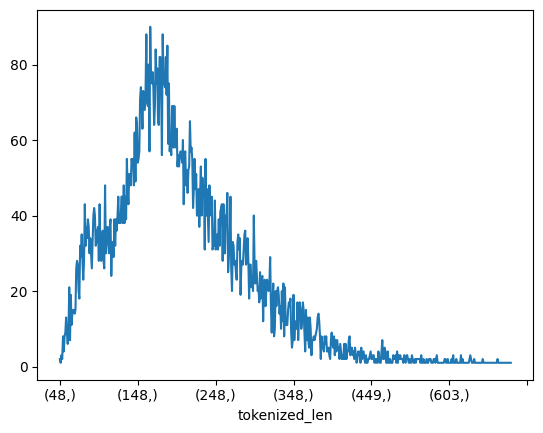

In [14]:
import matplotlib.pyplot as plt

len_cnt = train_df.value_counts(['tokenized_len'])
len_cnt.sort_index(ascending=True).plot()

# 요약 문장

<Axes: xlabel='summary_tokenized_len'>

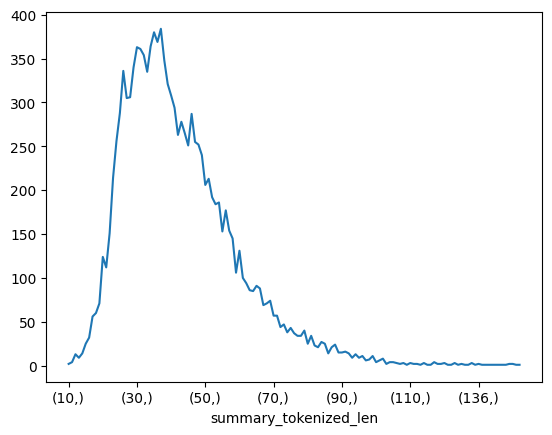

In [15]:
tokenized_list = []
tokenized_len_list = []

for i in range(train_df.shape[0]):
    s = train_df.iloc[i, 2]
    tokenized = tokenizer.encode(s)

    tokenized_list.append(tokenized)
    tokenized_len_list.append(len(tokenized))

train_df['summary_tokenized'] = tokenized_list
train_df['summary_tokenized_len'] = tokenized_len_list

import matplotlib.pyplot as plt

len_cnt = train_df.value_counts(['summary_tokenized_len'])
len_cnt.sort_index(ascending=True).plot()

## tokeninzing 결과 확인
- 원본 -> 토큰
- 토큰 -> 원본

In [16]:
train_df

,fname,dialogue,summary,topic,preprocessed_dialogue,preprocessed_summary,tokenized,tokenized_len,summary_tokenized,summary_tokenized_len
0,train_0,"#Person1#: 안녕하세요, 스미스씨. 저는 호킨스 의사입니다. 오늘 왜 오셨나...","스미스씨가 건강검진을 받고 있고, 호킨스 의사는 매년 건강검진을 받는 것을 권장합니...",건강검진 받기,"#Person1#: 안녕하세요, 스미스씨. 저는 호킨스 의사입니다. 오늘 왜 오셨나...","스미스씨가 건강검진을 받고 있고, 호킨스 의사는 매년 건강검진을 받는 것을 권장합니...","[0, 23782, 279, 27621, 14889, 248, 234, 257, 2...",259,"[0, 29942, 11440, 15373, 15151, 9039, 16534, 1...",48
1,train_1,"#Person1#: 안녕하세요, 파커 부인, 어떻게 지내셨나요?\n#Person2#...",파커 부인이 리키를 데리고 백신 접종을 하러 갔다. 피터스 박사는 기록을 확인한 후...,백신,"#Person1#: 안녕하세요, 파커 부인, 어떻게 지내셨나요?\n#Person2#...",파커 부인이 리키를 데리고 백신 접종을 하러 갔다. 피터스 박사는 기록을 확인한 후...,"[0, 23782, 279, 27621, 14889, 248, 234, 257, 2...",224,"[0, 14240, 12922, 14062, 14635, 14420, 13109, ...",33
2,train_2,"#Person1#: 실례합니다, 열쇠 한 묶음 보셨나요?\n#Person2#: 어떤...","#Person1#은 열쇠 한 묶음을 찾고 있고, 그것을 찾기 위해 #Person2#...",열쇠 찾기,"#Person1#: 실례합니다, 열쇠 한 묶음 보셨나요?\n#Person2#: 어떤...","#Person1#은 열쇠 한 묶음을 찾고 있고, 그것을 찾기 위해 #Person2#...","[0, 23782, 279, 27621, 14889, 248, 234, 257, 1...",168,"[0, 23782, 279, 27621, 14889, 248, 234, 12005,...",29
3,train_3,#Person1#: 왜 너는 여자친구가 있다는 걸 말해주지 않았어?\n#Person...,#Person1#은 #Person2#가 여자친구가 있고 그녀와 결혼할 것이라는 사실...,여자친구가 있다,#Person1#: 왜 너는 여자친구가 있다는 걸 말해주지 않았어?\n#Person...,#Person1#은 #Person2#가 여자친구가 있고 그녀와 결혼할 것이라는 사실...,"[0, 23782, 279, 27621, 14889, 248, 234, 257, 1...",188,"[0, 23782, 279, 27621, 14889, 248, 234, 12005,...",39
4,train_4,"#Person1#: 안녕, 숙녀분들! 오늘 밤 당신들은 정말 멋져 보여. 이 춤을 ...",말릭이 니키에게 춤을 요청한다. 말릭이 발을 밟는 것을 신경 쓰지 않는다면 니키는 ...,댄스,"#Person1#: 안녕, 숙녀분들! 오늘 밤 당신들은 정말 멋져 보여. 이 춤을 ...",말릭이 니키에게 춤을 요청한다. 말릭이 발을 밟는 것을 신경 쓰지 않는다면 니키는 ...,"[0, 23782, 279, 27621, 14889, 248, 234, 257, 2...",166,"[0, 14070, 10477, 12034, 16513, 13109, 14120, ...",25
...,...,...,...,...,...,...,...,...,...,...
12452,train_12455,#Person1#: 실례합니다. 맨체스터 출신의 그린 씨이신가요?\n#Person2...,탄 링은 흰머리와 수염으로 쉽게 인식되는 그린 씨를 만나 호텔로 데려갈 예정입니다....,누군가를 태우다,#Person1#: 실례합니다. 맨체스터 출신의 그린 씨이신가요?\n#Person2...,탄 링은 흰머리와 수염으로 쉽게 인식되는 그린 씨를 만나 호텔로 데려갈 예정입니다....,"[0, 23782, 279, 27621, 14889, 248, 234, 257, 1...",365,"[0, 15009, 23602, 12005, 19707, 10548, 16232, ...",36
12453,train_12456,#Person1#: 이윙 씨가 우리가 컨퍼런스 센터에 오후 4시에 도착해야 한다고 ...,#Person1#과 #Person2#는 이윙 씨가 늦지 않도록 요청했기 때문에 컨퍼...,컨퍼런스 센터,#Person1#: 이윙 씨가 우리가 컨퍼런스 센터에 오후 4시에 도착해야 한다고 ...,#Person1#과 #Person2#는 이윙 씨가 늦지 않도록 요청했기 때문에 컨퍼...,"[0, 23782, 279, 27621, 14889, 248, 234, 257, 1...",128,"[0, 23782, 279, 27621, 14889, 248, 234, 9120, ...",37
12454,train_12457,#Person1#: 오늘 어떻게 도와드릴까요?\n#Person2#: 차를 빌리고 싶...,#Person2#는 #Person1#의 도움으로 5일 동안 소형 차를 빌립니다.,차 렌트,#Person1#: 오늘 어떻게 도와드릴까요?\n#Person2#: 차를 빌리고 싶...,#Person2#는 #Person1#의 도움으로 5일 동안 소형 차를 빌립니다.,"[0, 23782, 279, 27621, 14889, 248, 234, 257, 1...",166,"[0, 23782, 279, 27621, 14889, 249, 234, 9698, ...",25
12455,train_12458,#Person1#: 오늘 좀 행복해 보이지 않아. 무슨 일 있어?\n#Person2...,#Person2#의 엄마가 일자리를 잃었다. #Person2#는 엄마가 우울해하지 ...,실직,#Person1#: 오늘 좀 행복해 보이지 않아. 무슨 일 있어?\n#Person2...,#Person2#의 엄마가 일자리를 잃었다. #Person2#는 엄마가 우울해하지 ...,"[0, 23782, 279, 27621, 14889, 248, 234, 257, 1...",213,"[0, 23782, 279, 27621, 14889, 249, 234, 12024,...",51


In [21]:
dialogue = train_df.iloc[0, 1]
dia_tokenized = train_df.iloc[0, 6]

summary = train_df.iloc[0, 2]
sum_tokenized = train_df.iloc[0, 8]

In [19]:
dia_tokenized

'#Person1#: 안녕하세요, 스미스씨. 저는 호킨스 의사입니다. 오늘 왜 오셨나요?\n#Person2#: 건강검진을 받는 것이 좋을 것 같아서요.\n#Person1#: 그렇군요, 당신은 5년 동안 건강검진을 받지 않았습니다. 매년 받아야 합니다.\n#Person2#: 알고 있습니다. 하지만 아무 문제가 없다면 왜 의사를 만나러 가야 하나요?\n#Person1#: 심각한 질병을 피하는 가장 좋은 방법은 이를 조기에 발견하는 것입니다. 그러니 당신의 건강을 위해 최소한 매년 한 번은 오세요.\n#Person2#: 알겠습니다.\n#Person1#: 여기 보세요. 당신의 눈과 귀는 괜찮아 보입니다. 깊게 숨을 들이쉬세요. 스미스씨, 담배 피우시나요?\n#Person2#: 네.\n#Person1#: 당신도 알다시피, 담배는 폐암과 심장병의 주요 원인입니다. 정말로 끊으셔야 합니다. \n#Person2#: 수백 번 시도했지만, 습관을 버리는 것이 어렵습니다.\n#Person1#: 우리는 도움이 될 수 있는 수업과 약물들을 제공하고 있습니다. 나가기 전에 더 많은 정보를 드리겠습니다.\n#Person2#: 알겠습니다, 감사합니다, 의사선생님.'

In [22]:
print(dialogue)
print('----------------------------------------')
print(tokenizer.decode(dia_tokenized))

#Person1#: 안녕하세요, 스미스씨. 저는 호킨스 의사입니다. 오늘 왜 오셨나요?
#Person2#: 건강검진을 받는 것이 좋을 것 같아서요.
#Person1#: 그렇군요, 당신은 5년 동안 건강검진을 받지 않았습니다. 매년 받아야 합니다.
#Person2#: 알고 있습니다. 하지만 아무 문제가 없다면 왜 의사를 만나러 가야 하나요?
#Person1#: 심각한 질병을 피하는 가장 좋은 방법은 이를 조기에 발견하는 것입니다. 그러니 당신의 건강을 위해 최소한 매년 한 번은 오세요.
#Person2#: 알겠습니다.
#Person1#: 여기 보세요. 당신의 눈과 귀는 괜찮아 보입니다. 깊게 숨을 들이쉬세요. 스미스씨, 담배 피우시나요?
#Person2#: 네.
#Person1#: 당신도 알다시피, 담배는 폐암과 심장병의 주요 원인입니다. 정말로 끊으셔야 합니다. 
#Person2#: 수백 번 시도했지만, 습관을 버리는 것이 어렵습니다.
#Person1#: 우리는 도움이 될 수 있는 수업과 약물들을 제공하고 있습니다. 나가기 전에 더 많은 정보를 드리겠습니다.
#Person2#: 알겠습니다, 감사합니다, 의사선생님.
----------------------------------------
<s> #Person1#: 안녕하세요, 스미스씨. 저는 호킨스 의사입니다. 오늘 왜 오셨나요?
#Person2#: 건강검진을 받는 것이 좋을 것 같아서요.
#Person1#: 그렇군요, 당신은 5년 동안 건강검진을 받지 않았습니다. 매년 받아야 합니다.
#Person2#: 알고 있습니다. 하지만 아무 문제가 없다면 왜 의사를 만나러 가야 하나요?
#Person1#: 심각한 질병을 피하는 가장 좋은 방법은 이를 조기에 발견하는 것입니다. 그러니 당신의 건강을 위해 최소한 매년 한 번은 오세요.
#Person2#: 알겠습니다.
#Person1#: 여기 보세요. 당신의 눈과 귀는 괜찮아 보입니다. 깊게 숨을 들이쉬세요. 스미스씨, 담배 피우시나요?
#Person2#: 네.
#Pers

In [23]:
print(summary)
print('----------------------------------------')
print(tokenizer.decode(sum_tokenized))

스미스씨가 건강검진을 받고 있고, 호킨스 의사는 매년 건강검진을 받는 것을 권장합니다. 호킨스 의사는 스미스씨가 담배를 끊는 데 도움이 될 수 있는 수업과 약물에 대한 정보를 제공할 것입니다.
----------------------------------------
<s> 스미스씨가 건강검진을 받고 있고, 호킨스 의사는 매년 건강검진을 받는 것을 권장합니다. 호킨스 의사는 스미스씨가 담배를 끊는 데 도움이 될 수 있는 수업과 약물에 대한 정보를 제공할 것입니다.</s>


: 

In [ ]:
tokenizer.tokenize(summary)

In [ ]:
male_names_50_korean = [
    "제임스", "존", "로버트", "마이클", "윌리엄", "데이빗", "리차드", "찰스", "조셉", "토마스",
    "다니엘", "매튜", "앤서니", "마크", "도널드", "스티븐", "폴", "앤드류", "조슈아", "케빈",
    "조지", "브라이언", "에드워드", "로널드", "티모시", "제이슨", "제프리", "라이언", "제이컵",
    "게리", "니콜라스", "에릭", "조너선", "스티븐", "래리", "저스틴", "스콧", "브랜던", "벤자민",
    "필립", "제이슨", "네이선", "로렌스", "윌버", "로렌", "레온", "존슨", "딜런", "매니"
]

female_names_50_korean = [
    "메리", "패트리시아", "제니퍼", "린다", "엘리자베스", "바바라", "수잔", "제시카", "사라", "카렌",
    "낸시", "리사", "마가렛", "베티", "산드라", "애슐리", "도로시", "킴벌리", "에밀리", "도나",
    "미셸", "캐롤", "아만다", "멜리사", "데보라", "스테파니", "레베카", "로라", "샤론", "신시아",
    "캐슬린", "헬렌", "에이미", "안젤라", "셜리", "안나", "브렌다", "파멜라", "니콜", "루스",
    "다이애나", "제시카", "소피아", "올리비아", "클로이", "애비게일", "엘라", "그레이스", "로즈", "미란다"
]
